In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ito_diffusions import *
plt.style.use('dark_background')

In [3]:
params = {
    'font.size': 14,
    'figure.figsize': (11,18),
    'axes.labelsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
}
plt.rcParams.update(params)

In [4]:
T = int(1e3)

## Autoregressive model AR(p)

$$X_t = a_0 + \sum_{i=1}^p a_{i} X_{t-i} + Z_t$$

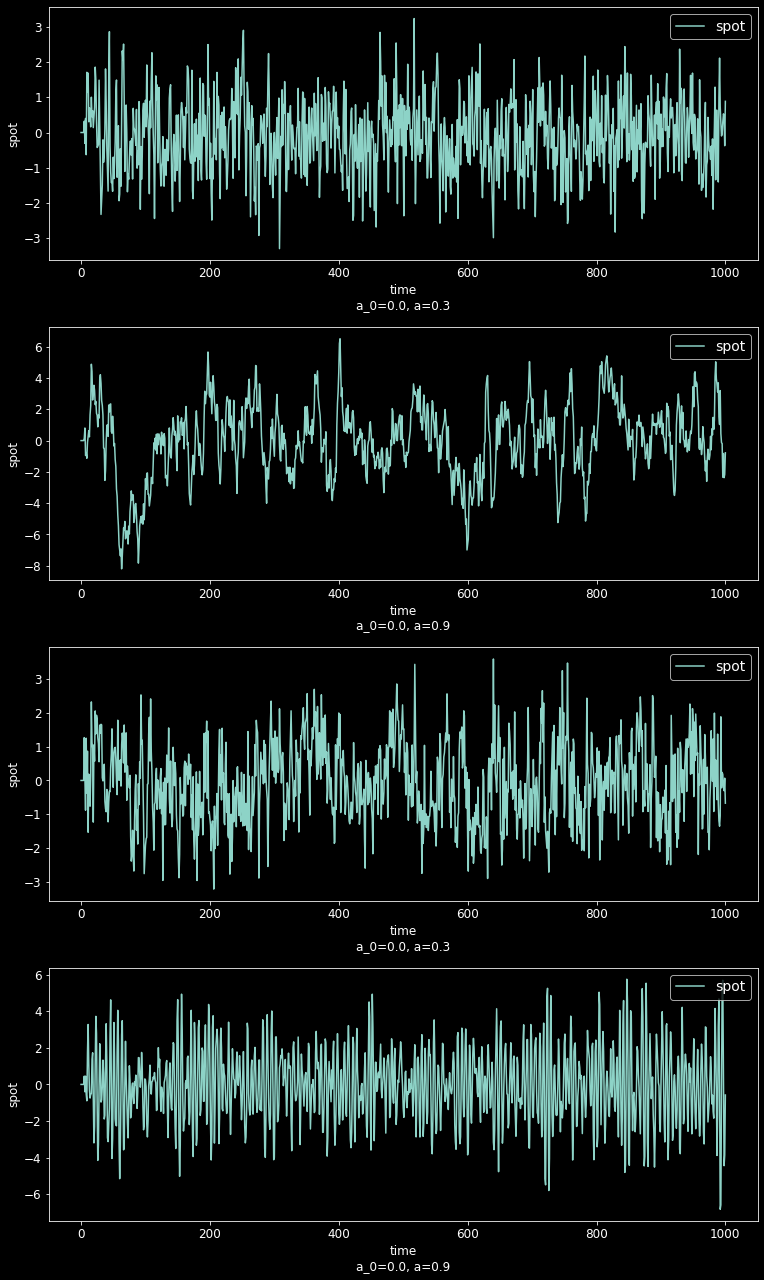

In [5]:
fig, axes = plt.subplots(nrows=4, ncols=1)

a_ = [
    [0.0, 0.3],
    [0.0, 0.9],
    [0.0, 0.3, 0.3],
    [0.0, 0.9, -0.8],
]

X = AR(x0=[0.0, 0.0, 0.0, 0.0], T=T, vol=1.0)

for i, ax in enumerate(axes):
    a = a_[i]
    X.a = a
    df = X.simulate()
    df.plot(kind='line', ax=ax)

    ax.set_xlabel('time\na_0={:.1f}, a={}'.format(a[0], a[1]))
    ax.set_ylabel('spot')
    ax.legend(loc='upper right')
    
plt.tight_layout()
plt.show()